In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IPL_2023.csv')

In [3]:
df[['Player', 'Team']] = df['Player'].str.split('\n', expand=True)

In [4]:
print(df.isnull().sum())

POS       0
Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
Team      0
dtype: int64


In [13]:
df.dropna(inplace=True)

In [14]:
df = df.fillna(0)

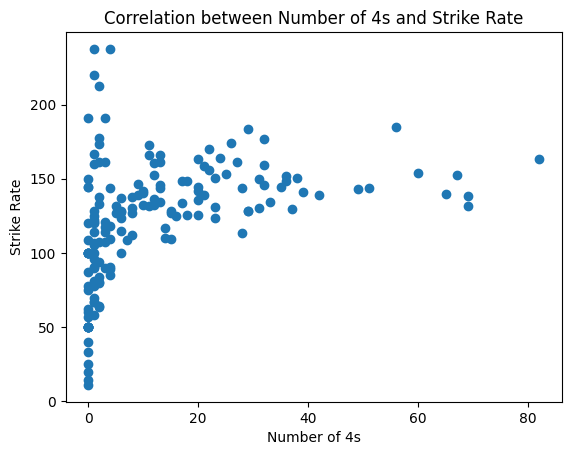

In [6]:
plt.scatter(df['4s'], df['SR'])
plt.xlabel('Number of 4s')
plt.ylabel('Strike Rate')
plt.title('Correlation between Number of 4s and Strike Rate')
plt.show()

In [15]:
print(df.head())

   POS            Player  Mat  Inns  NO  Runs    HS    Avg   BF      SR  100  \
0    1    Faf Du Plessis   14    14   1   730    84  56.15  475  153.68    0   
1    2      Shubman Gill   14    14   2   680  104*  56.67  446  152.46    2   
2    3       Virat Kohli   14    14   2   639  101*  53.25  457  139.82    2   
3    4  Yashasvi Jaiswal   14    14   1   625   124  48.08  382  163.61    1   
4    5      Devon Conway   14    13   2   585   92*  53.18  422  138.62    0   

   50  4s  6s Team  
0   8  60  36  RCB  
1   4  67  22   GT  
2   6  65  16  RCB  
3   5  82  26   RR  
4   6  69  16  CSK  


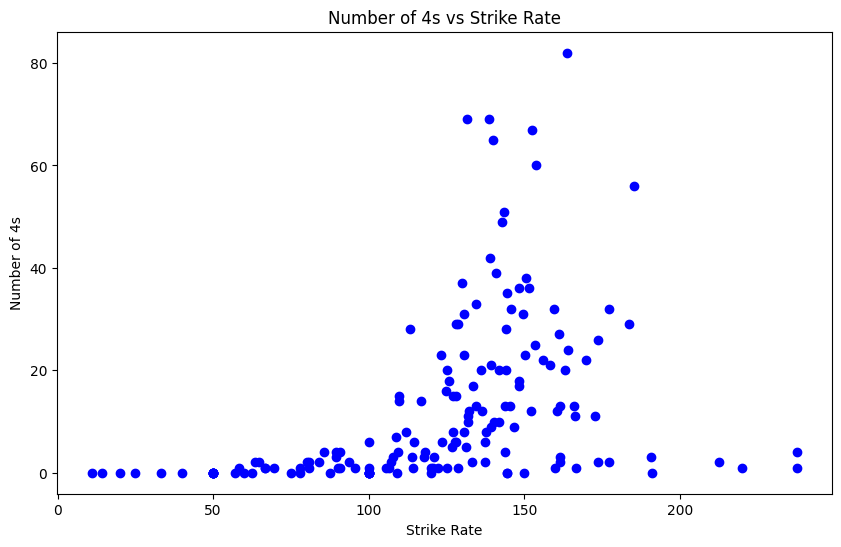

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['SR'], df['4s'], color='blue')
plt.title('Number of 4s vs Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Number of 4s')
plt.show()

In [24]:
X = df.drop(columns=['Player', 'Team', 'HS'])  # Assuming 'numUs' column exists
y = df['HS'] 

In [25]:
print(X.head())
print(y.head())

   POS  Mat  Inns  NO  Runs    Avg   BF      SR  100  50  4s  6s
0    1   14    14   1   730  56.15  475  153.68    0   8  60  36
1    2   14    14   2   680  56.67  446  152.46    2   4  67  22
2    3   14    14   2   639  53.25  457  139.82    2   6  65  16
3    4   14    14   1   625  48.08  382  163.61    1   5  82  26
4    5   14    13   2   585  53.18  422  138.62    0   6  69  16
0     84
1    104
2    101
3    124
4     92
Name: HS, dtype: int32


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
print(df.dtypes)

POS         int64
Player     object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS         object
Avg        object
BF          int64
SR        float64
100         int64
50          int64
4s          int64
6s          int64
Team       object
dtype: object


In [22]:
df['HS'] = df['HS'].str.replace('*', '').astype(int)  # Remove asterisks and convert to int
df = df.apply(pd.to_numeric, errors='ignore')

In [45]:
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')


In [46]:
X_train.fillna(X_train.mean(), inplace=True)


In [58]:
print(X_train.dtypes)

POS       int64
Mat       int64
Inns      int64
NO        int64
Runs      int64
Avg     float64
BF        int64
SR      float64
100       int64
50        int64
4s        int64
6s        int64
dtype: object


In [59]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

In [60]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

POS     0
Mat     0
Inns    0
NO      0
Runs    0
Avg     0
BF      0
SR      0
100     0
50      0
4s      0
6s      0
dtype: int64
0


In [61]:
X_train.fillna(X_train.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)

In [73]:
X_train.replace('-', np.nan, inplace=True)
X_train = X_train.apply(pd.to_numeric, errors='coerce')

In [63]:
model = LinearRegression()

In [76]:
model.fit(X_train, y_train)

LinearRegression()

In [64]:
try:
    model.fit(X_train, y_train)
    print("Model fitting successful!")
except Exception as e:
    print("Error fitting model:", e)

Model fitting successful!


In [83]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"model.coef_ shape: {model.coef_.shape}")
print(f"model.intercept_ shape: {model.intercept_.shape}")


X_train shape: (114, 12)
X_test shape: (49, 12)
model.coef_ shape: (12,)
model.intercept_ shape: ()


In [88]:
# Reshape X_train and X_test to 2D arrays
X_train_reshaped = X_train.to_numpy().reshape(-1, X_train.shape[1])
X_test_reshaped = X_test.to_numpy().reshape(-1, X_test.shape[1])


In [90]:
model.fit(X_train_reshaped, y_train)

LinearRegression()

In [102]:
y_pred_train = model.predict(X_train_reshaped)
y_pred_test = model.predict(X_test_reshaped)

In [97]:
X_train_reshaped[X_train_reshaped == '-'] = 0
X_test_reshaped[X_test_reshaped == '-'] = 0


In [98]:
X_train_reshaped = X_train_reshaped[~(X_train_reshaped == '-').any(axis=1)]
X_test_reshaped = X_test_reshaped[~(X_test_reshaped == '-').any(axis=1)]


In [107]:
X_train_1d = X_train_reshaped.reshape(-1)
X_test_1d = X_test_reshaped.reshape(-1)

In [111]:
X_all_1d = np.concatenate([X_train_1d, X_test_1d])

In [113]:
X_all_1d = X_all_1d.astype(str)

In [105]:
y_pred_train = model.predict(X_train_reshaped)
y_pred_test = model.predict(X_test_reshaped)

In [114]:
le = LabelEncoder()
X_all_encoded = le.fit_transform(X_all_1d)

In [115]:
X_train_encoded = X_all_encoded[:len(X_train_1d)]
X_test_encoded = X_all_encoded[len(X_train_1d):]

In [116]:
X_train_reshaped = X_train_encoded.reshape(X_train_reshaped.shape)
X_test_reshaped = X_test_encoded.reshape(X_test_reshaped.shape)

In [120]:
X_all_encoded = ohe.fit_transform(X_all_1d.reshape(-1, 1))

In [119]:
ohe = OneHotEncoder()

In [121]:
X_train_encoded = X_all_encoded[:len(X_train_1d)]
X_test_encoded = X_all_encoded[len(X_train_1d):]

In [123]:
X_train_encoded_shape = X_train_encoded.shape
X_test_encoded_shape = X_test_encoded.shape

In [124]:
X_train_reshaped = X_train_encoded.toarray().reshape(X_train_encoded_shape)
X_test_reshaped = X_test_encoded.toarray().reshape(X_test_encoded_shape)

In [93]:
print(f"X_train_reshaped shape: {X_train_reshaped.shape}")
print(f"X_test_reshaped shape: {X_test_reshaped.shape}")


X_train_reshaped shape: (114, 12)
X_test_reshaped shape: (49, 12)


In [94]:
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


y_train shape: (114,)
y_test shape: (49,)


In [68]:
X_train.replace('-', np.nan, inplace=True)
X_train = X_train.apply(pd.to_numeric, errors='coerce')

In [30]:
data= pd.DataFrame(df)

In [32]:
print("DataFrame structure:")
print(data.head())

DataFrame structure:
   POS            Player  Mat  Inns  NO  Runs   HS    Avg   BF      SR  100  \
0    1    Faf Du Plessis   14    14   1   730   84  56.15  475  153.68    0   
1    2      Shubman Gill   14    14   2   680  104  56.67  446  152.46    2   
2    3       Virat Kohli   14    14   2   639  101  53.25  457  139.82    2   
3    4  Yashasvi Jaiswal   14    14   1   625  124  48.08  382  163.61    1   
4    5      Devon Conway   14    13   2   585   92  53.18  422  138.62    0   

   50  4s  6s Team  
0   8  60  36  RCB  
1   4  67  22   GT  
2   6  65  16  RCB  
3   5  82  26   RR  
4   6  69  16  CSK  


In [34]:
print("\nNull values in DataFrame:")
print(data.isnull().sum())


Null values in DataFrame:
POS       0
Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
Team      0
dtype: int64


In [35]:
print("\nData types before conversion:")
print(data.dtypes)



Data types before conversion:
POS         int64
Player     object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS          int32
Avg        object
BF          int64
SR        float64
100         int64
50          int64
4s          int64
6s          int64
Team       object
dtype: object


In [36]:
X = data.drop(columns=['Player', 'Team', 'HS'])
y = data['HS']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [38]:
print("\nMissing values in X_train:")
print(X_train.isnull().sum())
print("\nMissing values in y_train:")
print(y_train.isnull().sum())


Missing values in X_train:
POS     0
Mat     0
Inns    0
NO      0
Runs    0
Avg     0
BF      0
SR      0
100     0
50      0
4s      0
6s      0
dtype: int64

Missing values in y_train:
0


In [39]:
print("\nData types in X_train after split:")
print(X_train.dtypes)


Data types in X_train after split:
POS       int64
Mat       int64
Inns      int64
NO        int64
Runs      int64
Avg      object
BF        int64
SR      float64
100       int64
50        int64
4s        int64
6s        int64
dtype: object


In [41]:
data.dropna(inplace=True)

In [74]:
X = data.drop(['6s'], axis=1)
Y = data['6s']
